# Домашнее задание 5

## Задача 1

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

#### Решение

$\sigma = 16$

$1 - \alpha = 0.95$

$\overline{X} = 80$

n = 256

$\overline{X} - t_{\frac{\alpha}{2}}\cdot\frac{\sigma}{\sqrt{n}} \le \mu \le \overline{X} + t_{\frac{\alpha}{2}}\cdot\frac{\sigma}{\sqrt{n}}$

In [2]:
from scipy import stats

In [5]:
t_alpha = stats.norm.cdf(0.025)
t_alpha

0.509972518195238

In [6]:
16./(256)**(0.5) 

1.0

Таким образом, получаем ответ:



$80 - 0.51 \le \mu \le 80 + 0.51$

Как-то очень плотно. Но ведь t - это квантиль нормального стандартного? Мы же знаем распределение. Кстати об этом, вот вопрос: а в каких вообще жизненных задачах может так получиться, что нам надо оценить среднее при том, что мы знаем наперед ско? Или это чисто для тренировки?

## Задача 2

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190

Известно, что их веса распределены нормально.
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?
2. Найдите P-значение для данного теста.

#### Решение

Гипотеза $H_0$: $\mu = 200$

In [7]:
import numpy as np

In [14]:
x = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
mean = x.mean()
std = x.std(ddof = 1)
n = len(x)
mean, std

(198.5, 4.453463071962462)

In [29]:
p = 0.99
alpha = 0.01
t1, t2 = stats.t.ppf(alpha/2, df = n - 1), stats.t.ppf(1 - alpha/2, df = n - 1)
t1, t2

(-3.24983554401537, 3.2498355440153697)

Берем статистику t

In [26]:
def statistic(samples):
    return (samples.mean() - 1) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

In [27]:
S = statistic(x)

### И сам вывод

In [28]:
if (t1 <= S <= t2):
    print("H_0 accepted")
else:
    print("H_0 declined")
    print(S)

H_0 declined
140.23914149310346


Ох, бред, я чувствую, получился. Даже если и нет, курс для меня внезапно превратился в заклинания, которые просто применяем: почему именно такие статистики, почему именно такие распределения должны быть...или это я один поплыл. Буду изучать подробнее. И буду рад посоветованной литературе помиимо

### P-value

Так как рассматриваем двустороннюю альтернативную гипотезу, P-value находим по формуле:

$$ P = 2\cdot min(P_l, P_r)
$$

In [32]:
P_l, P_r = (stats.t.cdf(S, df = n-1), 1 - stats.t.cdf(S, df = n-1))
P = 2*min(P_l, P_r)
P

2.220446049250313e-16

То есть, действительно, вероятность того, что матожидание у нас 200 невелика. Сильно невелика

In [34]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

(array([0.03571429, 0.07142857, 0.03571429, 0.10714286, 0.10714286]),
 array([190. , 192.8, 195.6, 198.4, 201.2, 204. ]),
 <BarContainer object of 5 artists>)

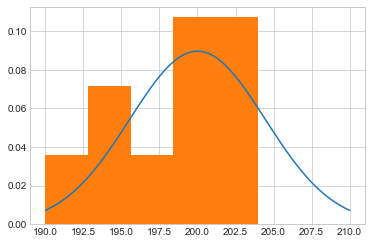

In [62]:
ox = np.linspace(190, 210, 500)
oy = stats.norm.pdf(ox, loc = 200, scale = std)

ox1 = x
oy1 = np.histogram(x)

plt.plot(ox, oy)
plt.hist(x, bins = 5, density=True)

### И вот тут опять у меня вопросы: 

1) почему так? Почему не просто сумма двух хвостов - левого и правого.

2) В случае с нормальным распределением или стьюдентом хвосты эти не будут равновелики? Ведь распределения симметричны?

3) Почему в нашем примере мы можем позволить себе, что статистика будет распределена нормально? Я понимаю, что у нас было ЦПТ, но ведь она же говорит о стремлении при $n \to \infty$, верно? А у нас наблюдений совсем немного 


## Задача 3

Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

#### Решение

$H_0: \mu = 17$

$H_1: \mu > 17$

Дисперсию знаем, значит, используем статистику

$$Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}},$$

In [65]:
Z = (17.5 - 17) / (4 / 10)
Z

1.25

Найдем теперь квантиль нормального $t_{1 - 0.025}$

In [68]:
t = stats.norm.ppf(1 - 0.025)
t

1.959963984540054

### И сам вывод:

In [70]:
if (Z <= t):
    print("H_0 accepted")
else:
    print("H_0 declined")
    print(S)

H_0 accepted


### И снова вопросы: 

1) В чем принципиальная логика брать правосторонюю альтернативу вместо двусторонней: типа, поскай будут подшипники маленькие - неважно; но не дай бог мы узнаем, что станок-транжира тратит слишком много металла?

2) И опять же вопрос про известную дисперсию: Как так может получиться, что мы знаем, какой разброс у станка, но что он там в среднем вытачивает - хз? Я не придираюсь, естесственно, просто пытаюсь понять ))

## Задача 4

Дана выборка диаметров подшипников из примера 1 с занятия 5:

samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ]

Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

#### Решение

In [75]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ])

In [76]:
variance = 0.065
sample_variance = np.std(samples, ddof=1)

In [86]:
H = (n - 1) * sample_variance / variance
H

38.681344168557416

In [87]:
t_1 = stats.chi2.ppf( 0.025, df = n-1)

t_2 = stats.chi2.ppf( 1 - 0.025, df = n-1)
t_1, t_2



(2.7003894999803584, 19.02276779864163)

Как видим, статистика попала правее правой квантили, т е попала в правый хвост

### Вывод: 
Гипотеза отвергается, дисперсия не такая